# CaseMeta Lab

In [1]:
import pandas as pd
import shutil 

import matplotlib as mpl
from matplotlib import font_manager
shutil.rmtree(mpl.get_cachedir(), ignore_errors=True)
mpl.rcParams['font.sans-serif'] = "MyriadProRegular"
mpl.rcParams['font.family'] = "sans-serif"

from bcd.container import BCDContainer
from bcd.data.analysis.case_meta import CaseMeta

container = BCDContainer()
container.init_resources()
container.wire(modules=['bcd.data.analysis.case_meta'])

In [2]:
repo = container.repo.meta()
calc = repo.get(filename='calc_cases.csv')

In [3]:
cases = calc.groupby(by='pathology')['patient_id'].nunique().to_frame().reset_index(names=['pathology', 'count'])
cases['type'] = 'case'
cases.columns = ['pathology', 'count', 'type']
abnorms = calc.groupby(by='pathology').size().to_frame().reset_index(names=['pathology', 'count'])
abnorms['type'] = 'abnormality'
abnorms.columns = ['pathology', 'count', 'type']
calc_cases = pd.concat([cases,abnorms], axis=0)
calc_cases


,pathology,count,type
0,BENIGN,420,case
1,MALIGNANT,343,case
0,BENIGN,1199,abnormality
1,MALIGNANT,673,abnormality


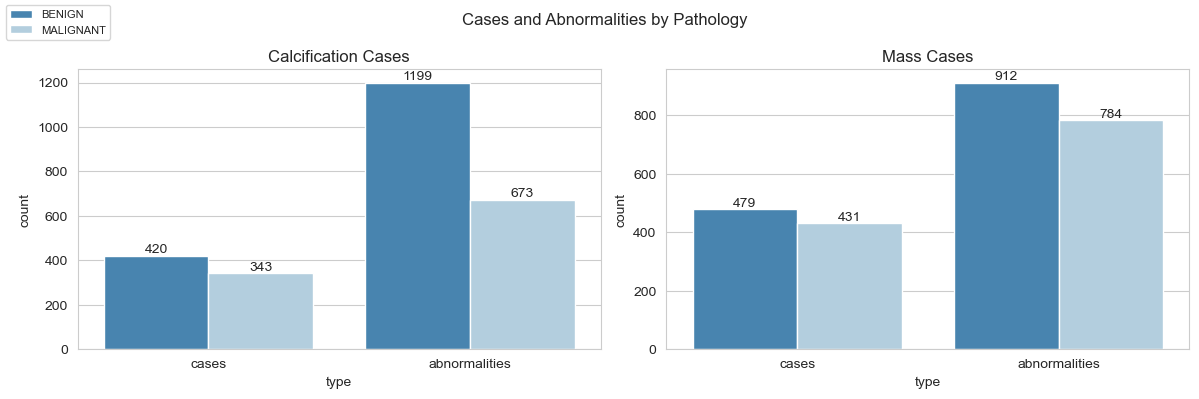

In [4]:
cm = CaseMeta()
cm.cases_and_abnormalities()

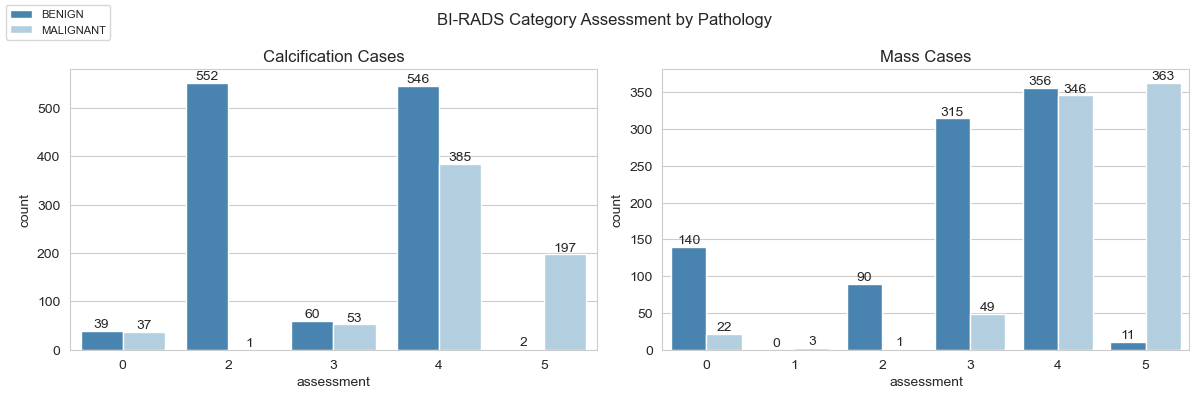

In [5]:
cm.abnormalities(title="BI-RADS Category Assessment by Pathology", measure='assessment', group='pathology', group_order=['BENIGN', 'MALIGNANT'])

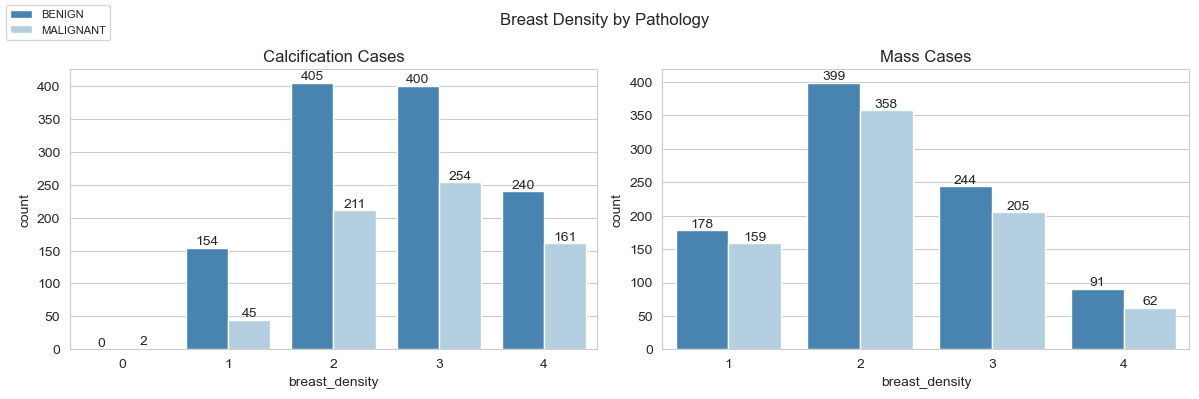

In [6]:
cm.abnormalities(title="Breast Density by Pathology", measure='breast_density', group='pathology', group_order=['BENIGN', 'MALIGNANT'])

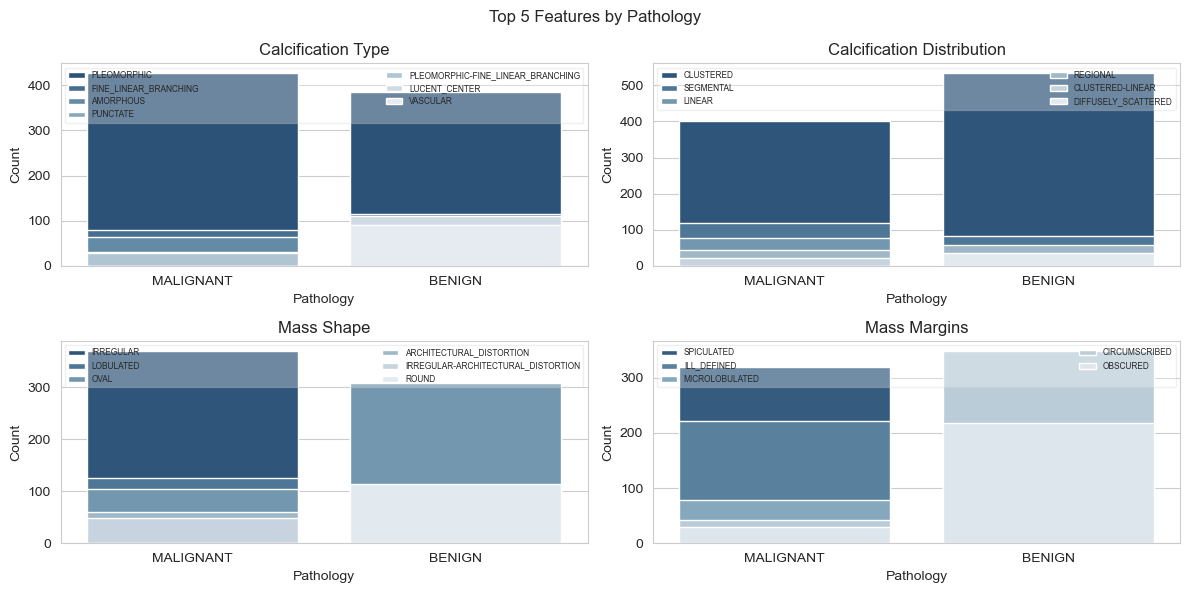

In [7]:
cm.pathology_feature()

In [8]:
from matplotlib import font_manager

print("List of all fonts currently available in the matplotlib:")
print(*font_manager.findSystemFonts(fontpaths=None, fontext='otf'), sep="\n")
print(font_manager.findfont("Myriad Pro"))

List of all fonts currently available in the matplotlib:
/usr/share/fonts/truetype/windows/MYRIADPRO-SEMIBOLD.OTF
/usr/share/fonts/truetype/windows/ROCKI.TTF
/usr/share/fonts/truetype/windows/msyh.ttc
/usr/share/fonts/truetype/windows/MTCORSVA.TTF
/usr/share/fonts/truetype/windows/BOD_CI.TTF
/usr/share/fonts/truetype/windows/msjhbd.ttc
/usr/share/fonts/truetype/ubuntu/UbuntuMono-R.ttf
/usr/share/fonts/truetype/windows/ANTQUAI.TTF
/usr/share/fonts/truetype/windows/Helvetica-Oblique.ttf
/usr/share/fonts/truetype/windows/ERASMD.TTF
/usr/share/fonts/truetype/windows/Poppins-Bold.ttf
/usr/share/fonts/opentype/urw-base35/P052-Roman.otf
/usr/share/fonts/truetype/dejavu/DejaVuSansMono-Bold.ttf
/usr/share/fonts/truetype/windows/Poppins-SemiBoldItalic.ttf
/usr/share/fonts/truetype/windows/LSANSI.TTF
/usr/share/fonts/truetype/windows/segoeuib.ttf
/usr/share/fonts/truetype/windows/sylfaen.ttf
/usr/share/fonts/truetype/windows/calibriz.ttf
/usr/share/fonts/truetype/windows/Helvetica.ttf
/usr/share/